In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid")

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
lap_times = pd.read_csv(r"F1_data\lap_times.csv")
races = pd.read_csv(r"F1_data\races.csv")
circuits = pd.read_csv(r"F1_data\circuits.csv")
drivers = pd.read_csv(r"F1_data\drivers.csv")
constructors = pd.read_csv(r"F1_data\constructors.csv")
results = pd.read_csv(r"F1_data\results.csv")

In [25]:
laps = races[['raceId', 'year', 'round', 'name']].merge(right=lap_times, on='raceId', how='outer')
laps = laps.merge(right=drivers[['driverId', 'code', 'dob', 'nationality']], on='driverId', how='outer')
laps.columns = ['raceId', 'year', 'round', 'name', 'driverId', 'lap', 'position_lap', 'time', 'milliseconds', 'code', 'dob', 'nationality_driver']

teams = results[['raceId', 'driverId', 'constructorId', 'position']].merge(right=constructors[['constructorId', 'constructorRef', 'nationality']],
                                                      on='constructorId', how='outer')
teams.columns = ['raceId', 'driverId', 'constructorId', 'position_race', 'constructorRef', 'nationality_constructor']

In [26]:
df = laps.merge(right=teams, on=['raceId', 'driverId'], how='outer')
df.head()

,raceId,year,round,name,driverId,lap,position_lap,time,milliseconds,code,dob,nationality_driver,constructorId,position_race,constructorRef,nationality_constructor
0,1.0,2009.0,1.0,Australian Grand Prix,1.0,1.0,13.0,1:49.088,109088.0,HAM,1985-01-07,British,1.0,\N,mclaren,British
1,1.0,2009.0,1.0,Australian Grand Prix,1.0,2.0,12.0,1:33.740,93740.0,HAM,1985-01-07,British,1.0,\N,mclaren,British
2,1.0,2009.0,1.0,Australian Grand Prix,1.0,3.0,11.0,1:31.600,91600.0,HAM,1985-01-07,British,1.0,\N,mclaren,British
3,1.0,2009.0,1.0,Australian Grand Prix,1.0,4.0,10.0,1:31.067,91067.0,HAM,1985-01-07,British,1.0,\N,mclaren,British
4,1.0,2009.0,1.0,Australian Grand Prix,1.0,5.0,10.0,1:32.129,92129.0,HAM,1985-01-07,British,1.0,\N,mclaren,British


In [96]:
df['name'].unique()

df.to_csv("df.csv", index=False)

circuits = ['Monaco Grand Prix', 'Italian Grand Prix', 'British Grand Prix']

In [93]:
winners = df[df.position_race == "1"]
ferrari = df[df.constructorRef == "ferrari"]
mercedes = df[df.constructorRef == "mercedes"]
three = df[df.name.isin(['Monaco Grand Prix', 'Italian Grand Prix', 'British Grand Prix'])]
three.head()

,raceId,year,round,name,driverId,lap,position_lap,time,milliseconds,code,dob,nationality_driver,constructorId,position_race,constructorRef,nationality_constructor
267,6.0,2009.0,6.0,Monaco Grand Prix,1.0,1.0,18.0,1:39.980,99980.0,HAM,1985-01-07,British,1.0,12,mclaren,British
268,6.0,2009.0,6.0,Monaco Grand Prix,1.0,2.0,17.0,1:25.188,85188.0,HAM,1985-01-07,British,1.0,12,mclaren,British
269,6.0,2009.0,6.0,Monaco Grand Prix,1.0,3.0,17.0,1:18.851,78851.0,HAM,1985-01-07,British,1.0,12,mclaren,British
270,6.0,2009.0,6.0,Monaco Grand Prix,1.0,4.0,17.0,1:18.896,78896.0,HAM,1985-01-07,British,1.0,12,mclaren,British
271,6.0,2009.0,6.0,Monaco Grand Prix,1.0,5.0,17.0,1:19.798,79798.0,HAM,1985-01-07,British,1.0,12,mclaren,British


* Average race speed of winner over time by race, get which races have stayed the same, consistent?
* Fasest race on average

In [72]:
race_count.sort_values("race_count")

,name,race_count
0,70th Anniversary Grand Prix,1
32,Tuscan Grand Prix,1
12,Eifel Grand Prix,1
30,Styrian Grand Prix,1
21,Luxembourg Grand Prix,2
25,Portuguese Grand Prix,2
2,Argentine Grand Prix,3
5,Azerbaijan Grand Prix,3
17,Indian Grand Prix,3
20,Korean Grand Prix,4


In [94]:
fastest_lap = pd.DataFrame({'fastest_lap' : three.groupby(['raceId', 'year', 'name'])['milliseconds'].min()}).reset_index()
race_count = pd.DataFrame({'race_count' : three.groupby(['name'])['raceId'].nunique()}).reset_index()
fastest_lap = fastest_lap.merge(race_count, on = "name")
fastest_lap = fastest_lap.sort_values(["name","year"])
fastest_lap

,raceId,year,name,fastest_lap,race_count
126,833.0,1950.0,British Grand Prix,NaN,71
125,829.0,1951.0,British Grand Prix,NaN,71
124,821.0,1952.0,British Grand Prix,NaN,71
123,813.0,1953.0,British Grand Prix,NaN,71
122,803.0,1954.0,British Grand Prix,NaN,71
121,797.0,1955.0,British Grand Prix,NaN,71
120,789.0,1956.0,British Grand Prix,NaN,71
119,780.0,1957.0,British Grand Prix,NaN,71
118,771.0,1958.0,British Grand Prix,NaN,71
117,760.0,1959.0,British Grand Prix,NaN,71


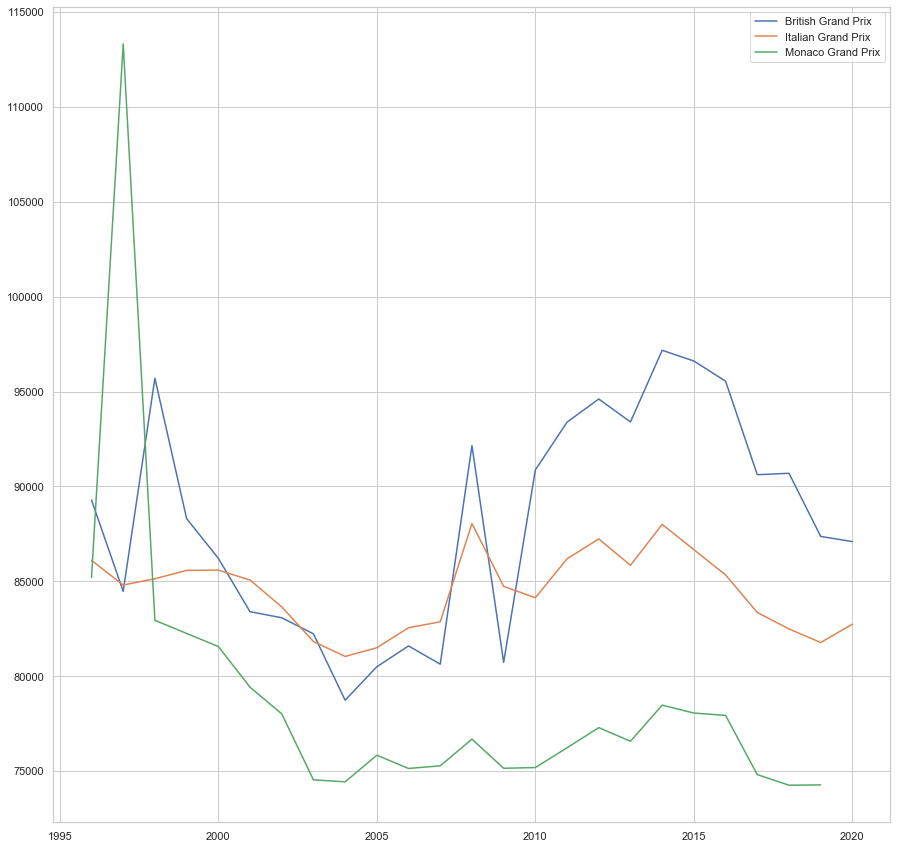

In [95]:
fig = plt.figure(figsize=(15,15))
for key, grp in fastest_lap[fastest_lap.race_count > 1].groupby(['name']):
    plt.plot(grp['year'], grp['fastest_lap'], label = key)
plt.legend(loc='best')    
plt.show()
